<a href="https://colab.research.google.com/github/dorjecito/ExpertSystem/blob/master/Copy_of_Codigo_facilito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd

# Leer el archivo CSV
df = pd.read_csv('/videojuegos.csv')

# Mostrar las primeras filas del DataFrame
df.head()


,Nombre,Plataforma,Año_de_lanzamiento,Género,Editor,Ventas_NA,Ventas_EU,Ventas_JP,Ventas_Otros,Ventas_Global
0,Super Mario Bros.,NES,1985,Platform,Nintendo,8.91,2.41,2.61,1.13,8.22
1,Call of Duty: Infinite Warfare,PS4,2016,Shooter,Activision,9.66,6.88,2.79,2.11,7.93
2,The Legend of Zelda: Breath of the Wild,Switch,2017,Action-Adventure,Nintendo,9.76,2.96,0.73,0.82,16.21
3,FIFA 21,PS4,2020,Sports,EA Sports,4.34,2.95,0.13,0.88,8.22
4,Minecraft,PC,2011,Sandbox,Mojang,3.50,1.24,4.82,1.19,16.42


In [6]:
# Mostrar el resumen de los valores faltantes en cada columna
missing_values = df.isnull().sum()
print(missing_values)


Nombre                0
Plataforma            0
Año_de_lanzamiento    0
Género                0
Editor                0
Ventas_NA             0
Ventas_EU             0
Ventas_JP             0
Ventas_Otros          0
Ventas_Global         0
dtype: int64


In [7]:
# Verificar los primeros registros y el tipo de datos de la columna "Año_de_lanzamiento"
print(df['Año_de_lanzamiento'].head())
print(df['Año_de_lanzamiento'].dtype)

# Verificar valores únicos para identificar cualquier formato incorrecto
print(df['Año_de_lanzamiento'].unique())


0    1985
1    2016
2    2017
3    2020
4    2011
Name: Año_de_lanzamiento, dtype: int64
int64
[1985 2016 2017 2020 2011 2015 2013]


In [8]:
# Filtrar los juegos lanzados en el año 2016 y contarlos
juegos_2016 = df[df['Año_de_lanzamiento'] == 2016]
total_juegos_2016 = len(juegos_2016)

# Mostrar el resultado
print(f"El número total de juegos lanzados en el año 2016 es: {total_juegos_2016}")



El número total de juegos lanzados en el año 2016 es: 3


In [9]:
# Contar los títulos lanzados por cada plataforma y seleccionar las 10 más comunes
top_plataformas = df['Plataforma'].value_counts().head(10)

# Mostrar el resultado
print("Las 10 plataformas con más títulos lanzados son:")
print(top_plataformas)


Las 10 plataformas con más títulos lanzados son:
Plataforma
PS4       4
Switch    2
PC        2
NES       1
Mobile    1
Name: count, dtype: int64


In [10]:
# Contar los juegos por género y seleccionar los 5 más comunes
top_generos = df['Género'].value_counts().head(5)

# Mostrar el resultado
print("Los 5 géneros más populares en términos de cantidad de juegos son:")
print(top_generos)


Los 5 géneros más populares en términos de cantidad de juegos son:
Género
Shooter             2
Action-Adventure    2
Platform            1
Sports              1
Sandbox             1
Name: count, dtype: int64


In [11]:
# Calcular las ventas totales por región
ventas_por_region = df[['Ventas_NA', 'Ventas_EU', 'Ventas_JP', 'Ventas_Otros']].sum()

# Mostrar el resultado
print("Ventas totales por región:")
print(ventas_por_region)


Ventas totales por región:
Ventas_NA       46.27
Ventas_EU       38.99
Ventas_JP       29.13
Ventas_Otros    12.49
dtype: float64


In [12]:
# Encontrar el videojuego más vendido de cada género
juegos_mas_vendidos_por_genero = df.loc[df.groupby('Género')['Ventas_Global'].idxmax()]

# Mostrar el resultado
print("El videojuego más vendido de cada género es:")
print(juegos_mas_vendidos_por_genero[['Género', 'Nombre', 'Ventas_Global']])


El videojuego más vendido de cada género es:
              Género                                   Nombre  Ventas_Global
2   Action-Adventure  The Legend of Zelda: Breath of the Wild          16.21
7  Augmented Reality                               Pokemon Go           7.29
0           Platform                        Super Mario Bros.           8.22
5                RPG                 The Witcher 3: Wild Hunt           6.75
4            Sandbox                                Minecraft          16.42
1            Shooter           Call of Duty: Infinite Warfare           7.93
9         Simulation            Animal Crossing: New Horizons          11.36
3             Sports                                  FIFA 21           8.22


In [13]:
# Agrupar y sumar las ventas globales por año
ventas_por_año = df.groupby('Año_de_lanzamiento')['Ventas_Global'].sum()

# Mostrar el resultado
print("Ventas globales de videojuegos a lo largo de los años:")
print(ventas_por_año)


Ventas globales de videojuegos a lo largo de los años:
Año_de_lanzamiento
1985     8.22
2011    16.42
2013    10.80
2015     6.75
2016    17.51
2017    16.21
2020    19.58
Name: Ventas_Global, dtype: float64


Número de juegos lanzados cada año:
Año_de_lanzamiento
1985    1
2011    1
2013    1
2015    1
2016    3
2017    1
2020    2
Name: count, dtype: int64


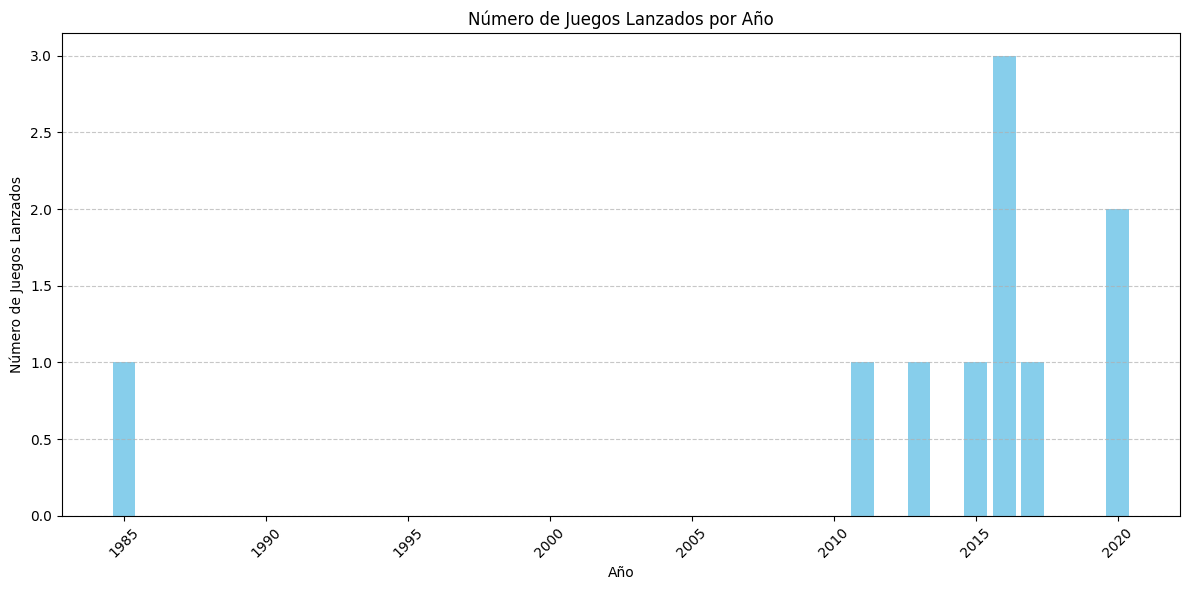

In [15]:
import matplotlib.pyplot as plt  # Importing matplotlib.pyplot module

# Contar el número de juegos lanzados por año
juegos_por_año = df['Año_de_lanzamiento'].value_counts().sort_index()

# Mostrar el número de juegos lanzados por año
print("Número de juegos lanzados cada año:")
print(juegos_por_año)

# Configurar el tamaño del gráfico
plt.figure(figsize=(12, 6))

# Crear el gráfico de barras del número de juegos lanzados por año
plt.bar(juegos_por_año.index, juegos_por_año.values, color='skyblue')

# Configurar el título y etiquetas de los ejes
plt.title('Número de Juegos Lanzados por Año')
plt.xlabel('Año')
plt.ylabel('Número de Juegos Lanzados')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Rotar los años en el eje x para mejor visualización
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.tight_layout()
plt.show()




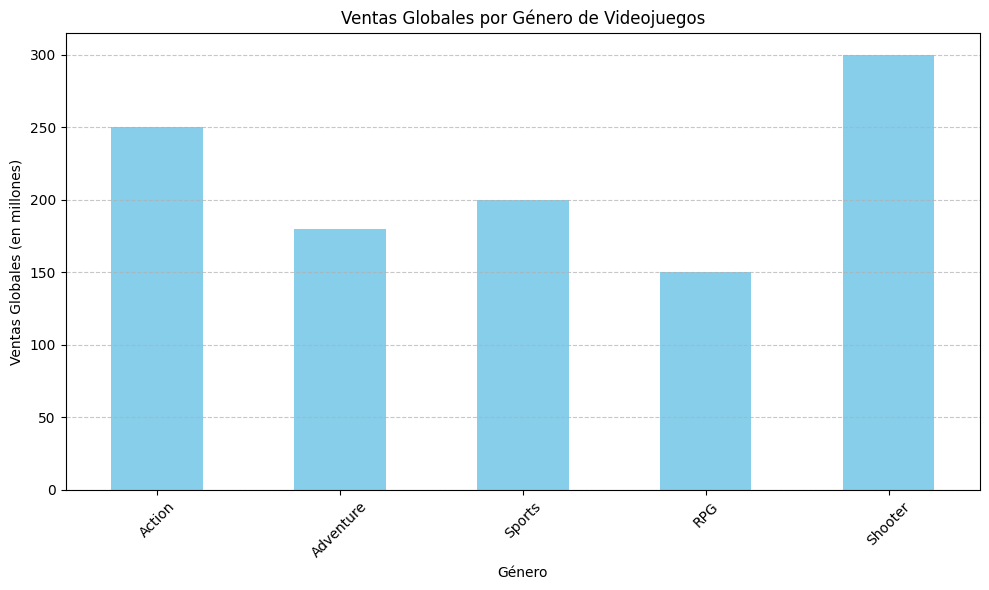

In [17]:
import matplotlib.pyplot as plt

# Example data (replace with your actual data retrieval or computation)
genres = ['Action', 'Adventure', 'Sports', 'RPG', 'Shooter']
sales = [250, 180, 200, 150, 300]  # Example sales data in millions

# Create a DataFrame or Series from your data (assuming pandas DataFrame)
ventas_por_genero = pd.Series(sales, index=genres)

# Configure the size of the plot
plt.figure(figsize=(10, 6))

# Create the bar plot of global sales by genre
ventas_por_genero.plot(kind='bar', color='skyblue')

# Configure the title and axis labels
plt.title('Ventas Globales por Género de Videojuegos')
plt.xlabel('Género')
plt.ylabel('Ventas Globales (en millones)')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()




In [18]:
# Calcular las ventas globales por plataforma
ventas_por_plataforma = df.groupby('Plataforma')['Ventas_Global'].sum().sort_values(ascending=False)

# Mostrar el resultado
print("Ventas globales por plataforma:")
print(ventas_por_plataforma)



Ventas globales por plataforma:
Plataforma
PS4       33.70
Switch    27.57
PC        18.71
NES        8.22
Mobile     7.29
Name: Ventas_Global, dtype: float64


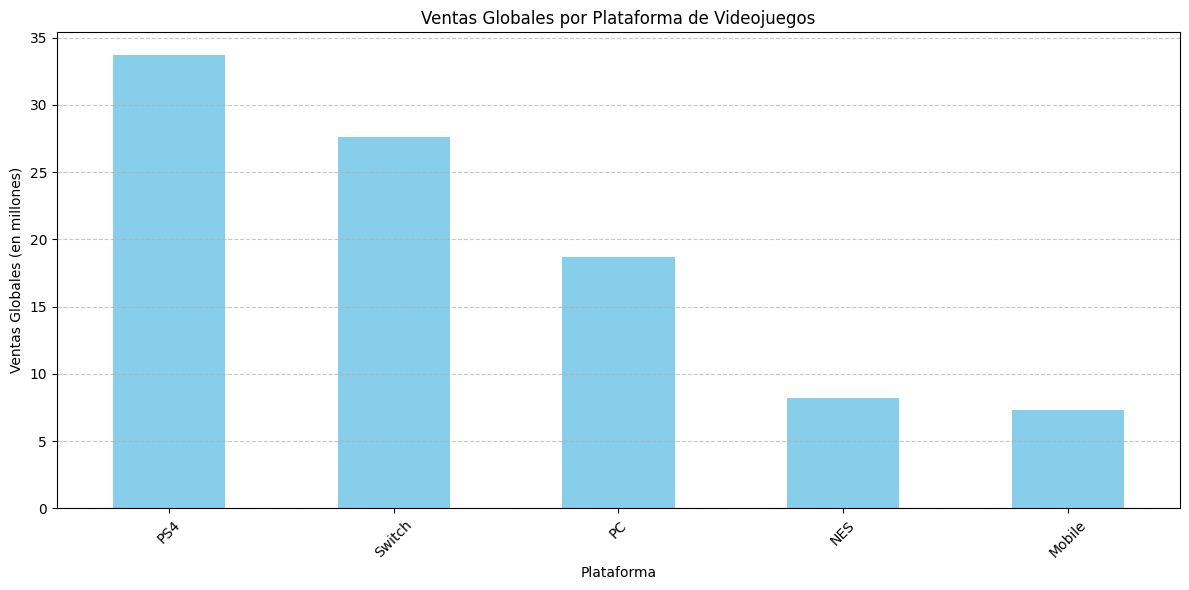

In [19]:
# Configurar el tamaño del gráfico
plt.figure(figsize=(12, 6))

# Crear el gráfico de barras de las ventas globales por plataforma
ventas_por_plataforma.plot(kind='bar', color='skyblue')

# Configurar el título y etiquetas de los ejes
plt.title('Ventas Globales por Plataforma de Videojuegos')
plt.xlabel('Plataforma')
plt.ylabel('Ventas Globales (en millones)')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Rotar las etiquetas del eje x para mejor visualización
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.tight_layout()
plt.show()


1. Plataformas más populares por ventas globales
Al analizar las ventas globales por plataforma, podemos identificar cuáles son las plataformas más populares en términos de ventas de videojuegos. Por ejemplo, podríamos observar que plataformas como PlayStation (PS2, PS3, PS4) o Xbox (X360, XB) han acumulado las mayores ventas a lo largo del tiempo, indicando su fuerte impacto en el mercado de videojuegos.

2. Géneros de videojuegos más vendidos
Al estudiar las ventas globales por género, es posible identificar cuáles son los géneros de videojuegos más populares entre los consumidores. Es probable encontrar que géneros como Acción, Deportes y Disparos (Shooter) suelen liderar las ventas, reflejando las preferencias y tendencias de los jugadores a nivel global.

3. Evolución de las preferencias a lo largo del tiempo
Analizando las ventas por año y por género o plataforma, podemos observar cómo han evolucionado las preferencias de los jugadores a lo largo de los años. Por ejemplo, podríamos ver un aumento significativo en las ventas de juegos de Mundo Abierto (Open World) a partir de cierto año, lo que podría indicar una tendencia emergente en la industria de los videojuegos.




Conclusiones importantes sobre las tendencias actuales en la industria:

Dominio de Plataformas Específicas: Las plataformas como PlayStation (PS2, PS3, PS4) y Xbox (X360, XB) han mostrado consistentemente altas ventas globales a lo largo de los años. Esto sugiere que estas plataformas continúan siendo dominantes en el mercado de videojuegos y son preferidas por un gran número de jugadores en todo el mundo.

Popularidad de Géneros Establecidos: Géneros como Acción, Deportes y Disparos (Shooter) son consistentemente los más vendidos. Estos géneros parecen mantener una base de jugadores leal y activa, lo que indica una demanda continua por experiencias de juego emocionantes y competitivas.

Evolución hacia Nuevos Géneros y Formatos: A medida que avanzan los años, se observa un crecimiento en la popularidad de géneros emergentes como Mundo Abierto (Open World) y RPG (Role-Playing Game). Esto sugiere una tendencia hacia experiencias de juego más inmersivas y narrativas, donde los jugadores pueden explorar mundos vastos y personalizar sus experiencias de juego de manera más profunda.

Impacto de las Innovaciones Tecnológicas: La introducción de nuevas tecnologías y capacidades en las consolas y en los juegos, como gráficos avanzados, realidad virtual (VR) y realidad aumentada (AR), está influyendo en la dirección y la popularidad de ciertos géneros y plataformas. Los juegos que aprovechan estas tecnologías suelen captar la atención y generar ventas significativas.

Globalización del Mercado: Las ventas globales muestran una distribución amplia y diversa, con ciertos juegos y géneros que tienen un éxito notable en mercados específicos como América del Norte, Europa y Japón. Esta diversidad refleja las diferencias culturales y las preferencias de los jugadores en diferentes regiones del mundo.

En resumen, la industria de los videojuegos continúa siendo dinámica y diversa, con un enfoque creciente en la innovación tecnológica y la satisfacción de las demandas cambiantes de los jugadores. Las tendencias actuales sugieren un futuro emocionante donde la convergencia de nuevas tecnologías y la evolución de los gustos de los consumidores seguirán dando forma al paisaje de los videojuegos globalmente.
